<a href="https://colab.research.google.com/github/jpaezg93/Case-Study-Cardiac-Risks/blob/main/graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

In [106]:
df =  pd.read_csv('Cleaned_Data.csv')
df.head(5)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,AgeRange
0,75,False,582,False,20,True,265000.00,1.9,130,True,False,4,True,Elder
1,55,False,7861,False,38,False,263358.03,1.1,136,True,False,6,True,Adult
2,65,False,146,False,20,False,162000.00,1.3,129,True,True,7,True,Elder
3,50,True,111,False,20,False,210000.00,1.9,137,True,False,7,True,Adult
4,65,True,160,True,20,False,327000.00,2.7,116,False,False,8,True,Elder


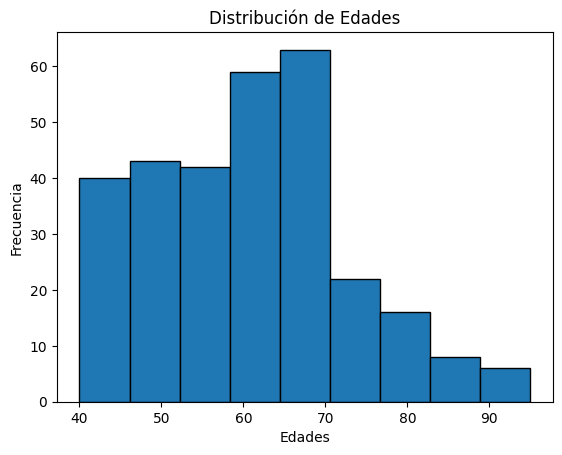

In [22]:
bins = int(np.log2(len(df['age'])))+1
plt.hist(df['age'], bins=bins, edgecolor='black')
plt.title('Distribución de Edades')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')

plt.show()

<ipython-input-138-4c51398e2289>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'DEATH_EVENT':'deceased', 'diabetes':'diabetic', 'anaemia':'anaemic', 'smoking':'smoker'},inplace=True)


Text(0, 0.5, 'Counts')

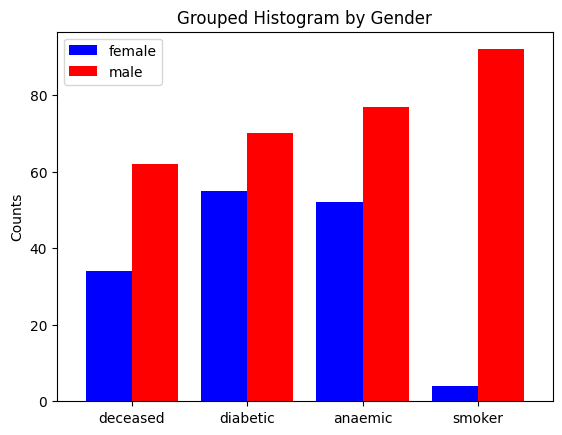

In [138]:
df1 = df[['sex', 'anaemia', 'diabetes', 'smoking', 'DEATH_EVENT']]
df1.rename(columns={'DEATH_EVENT':'deceased', 'diabetes':'diabetic', 'anaemia':'anaemic', 'smoking':'smoker'},inplace=True)
df1 = df1.groupby('sex', as_index=False).agg({'deceased':'sum', 'diabetic':'sum', 'anaemic':'sum','smoker':'sum'})
df1['sex'] = df1['sex'].replace(to_replace={True: 'male', False: 'female'})
df1.index=['female','male']
df2 = df1.drop('sex',axis=1).T
barplot = df2.plot(kind="bar", color={'blue','red'}, width=0.8)
plt.xticks(rotation='horizontal')
plt.title('Grouped Histogram by Gender')
plt.ylabel('Counts')

